# Create mapping file for Livneh, Salathe and PNNL meteorology datasets

## Setup workspace

In [ ]:
# path and directory management
import os

# gridded data processing
import ogh

# data migration library
from utilities import hydroshare

# plotting and shape libraries
%matplotlib inline
import pandas as pd

# graphical control libraries
import fiona

# silencing warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#hs=hydroshare.hydroshare()

homedir = '/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion'
os.chdir(homedir)
print('Data will be saved to:'+homedir)

 ## Location of meteorology dataset grid center points


In [3]:
grid_dir = '/home/jovyan/work/notebooks/GriddedMetDataDownload/MetDataGrids/'

# LIVNEH 2013 and SALATHE2014GridPOINTS
"""
1/16-degree Gridded cell centroids
"""
# List of available data
NAmer_VIC = os.path.join(grid_dir, 'NAmer_dem_list.shp')

#PNNL2018GridPOINTS
"""
# 5 km Gridded cell centroids
"""


NAmer_P = os.path.join(grid_dir, 'PNNL2018WRFwELi.shp')

In [4]:
print(NAmer_VIC)
print(NAmer_P)

/home/jovyan/work/notebooks/GriddedMetDataDownload/MetDataGrids/NAmer_dem_list.shp
/home/jovyan/work/notebooks/GriddedMetDataDownload/MetDataGrids/PNNL2018WRFwELi.shp


In [5]:
pwd

'/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion'

## Load watershed boundary shapefile


In [6]:
#file directory where shapefile saved
wsdir = '/home/jovyan/work/notebooks/GriddedMetDataDownload/watersheds'

# shapefile
puyallup= os.path.join(wsdir,'TempSensorRegion.shp')
ogh.reprojShapefile(puyallup)


## Visualize the basin



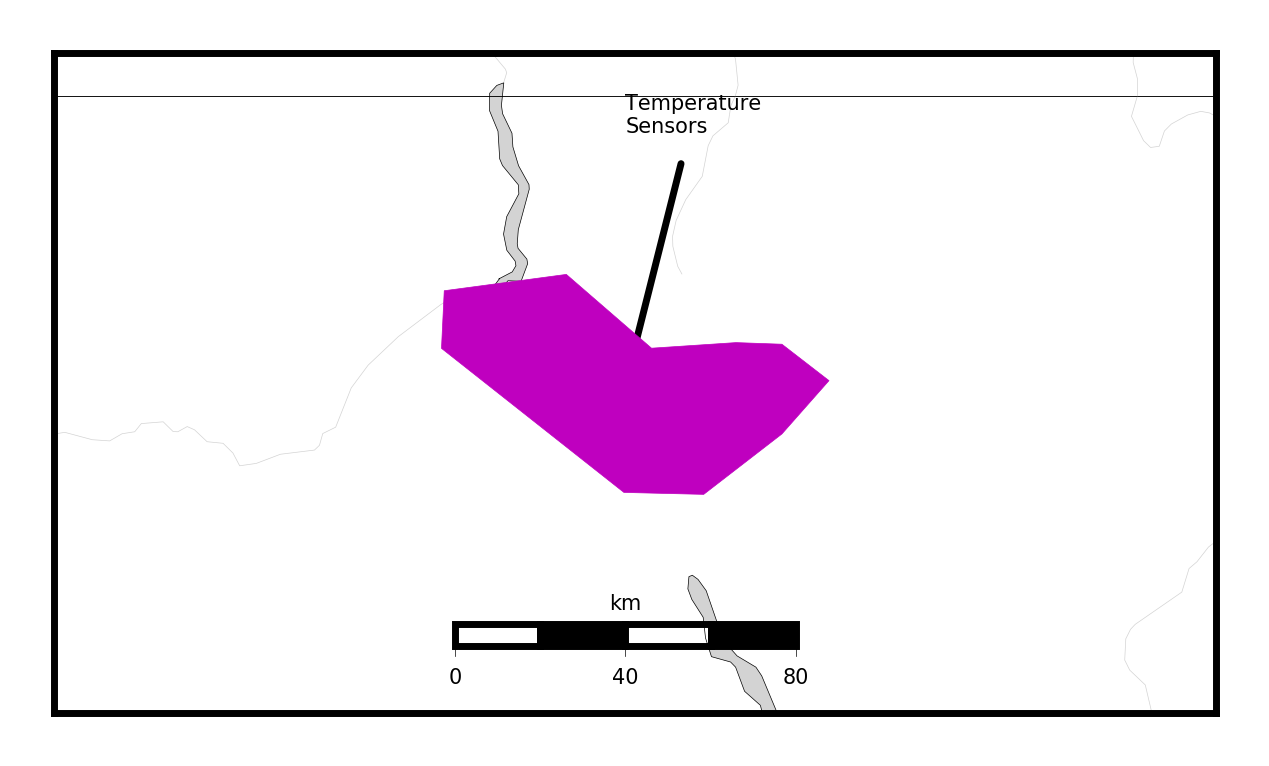

In [7]:
v1 = ogh.multiSiteVisual(listOfShapefiles=[puyallup], 
                         listOfNames=['Temperature Sensors'],
                         multishape=os.path.join(homedir,'watershed.shp'), 
                         projection='merc', epsg=3857, polygon_color='m', margin=1, 
                         scale_x_dist=0, scale_y_dist=-0.35, scale_ref_length=80, scale_yoffset=5000,
                         text_x_dist=0, text_y_dist=0.35)

In [8]:
#Check homedir, location where mappingfiles will be saved
homedir

'/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion'

In [9]:
#save mapping files
mappingfile_PNNL=ogh.treatgeoself_PNNL(shapefile=puyallup, NAmer=NAmer_P, buffer_distance=0.00,
                              mappingfile=os.path.join(homedir,'Temp_P_mappingfile_i.csv'))
print(mappingfile_PNNL)


mappingfile_VIC=ogh.treatgeoself(shapefile=puyallup, NAmer=NAmer_VIC, buffer_distance=0.00, 
                              mappingfile=os.path.join(homedir,'Temp_VIC_mappingfile.csv'))
print(mappingfile_VIC)


(34, 6)
   FID    SN    WE        LAT       LONG_         ELEV
0    0  57.0  60.0  48.464809 -120.792419  1566.227539
1    1  57.0  61.0  48.469715 -120.711258  1740.342163
2    2  57.0  62.0  48.474552 -120.630096  1806.527100
3    3  58.0  59.0  48.513668 -120.881042  1689.336548
4    4  58.0  60.0  48.518616 -120.799835  1700.479858
/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion/Temp_P_mappingfile_i.csv
(37, 4)
   FID       LAT      LONG_    ELEV
0    0  48.71875 -120.90625  1369.0
1    1  48.71875 -120.96875  1168.0
2    2  48.71875 -121.03125  1139.0
3    3  48.71875 -121.09375   867.0
4    4  48.71875 -121.15625   866.0
/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion/Temp_VIC_mappingfile.csv


## Visualize the gridded cell elevation gradient of each study site

In [10]:
mappingfile_PNNL

'/home/jovyan/work/notebooks/GriddedMetDataDownload/projects/TemperatureSensorRegion/Temp_P_mappingfile_i.csv'

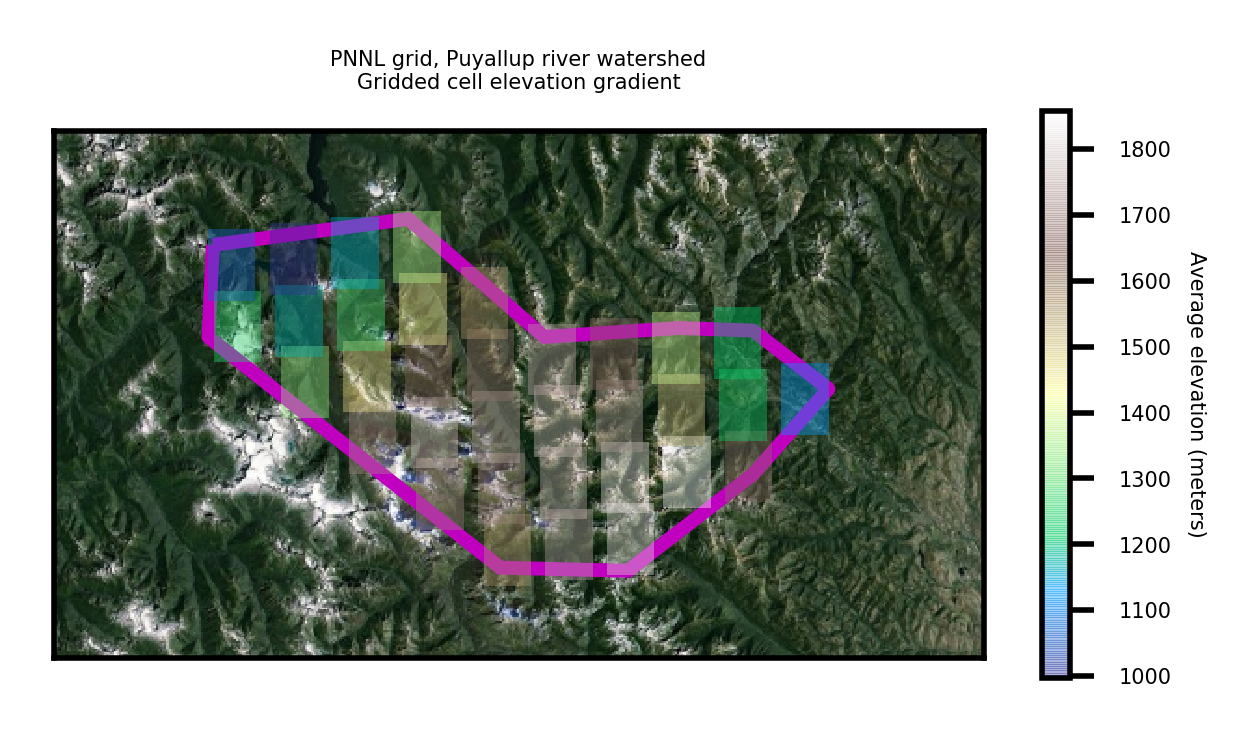

CPU times: user 14.5 s, sys: 1.23 s, total: 15.7 s
Wall time: 15.3 s


In [11]:
%%time 
# plot the watershed elevation gradient

for mappingfile, shp, sitename, outfilename in zip([mappingfile_PNNL],
                                                   [puyallup],
                                                   ['PNNL grid, Puyallup river'],
                                                   ['gcGradient_s.png']):

    # generate gridded Cell Gradient for the mappingfile ELEV variable
    ogh.griddedCellGradient(mappingfile=mappingfile_PNNL, 
                            shapefile=shp,
                            outfilepath=os.path.join(homedir, outfilename),
                            plottitle='{0} watershed\nGridded cell elevation gradient'.format(sitename),
                            colorbar_label='Average elevation (meters)',
                            spatial_resolution=1/16, margin=0.25, epsg=3857, column='ELEV',
                            basemap_image='ESRI_Imagery_World_2D', cmap='terrain')

In [ ]:
%%time 
# plot the watershed elevation gradient

for mappingfile, shp, sitename, outfilename in zip([mappingfile_VIC],
                                                   [puyallup],
                                                   ['VIC grid, Puyallup river'],
                                                   ['gcGradient_s.png']):

    # generate gridded Cell Gradient for the mappingfile ELEV variable
    ogh.griddedCellGradient(mappingfile=mappingfile_VIC, 
                            shapefile=shp,
                            outfilepath=os.path.join(homedir, outfilename),
                            plottitle='{0} watershed\nGridded cell elevation gradient'.format(sitename),
                            colorbar_label='Average elevation (meters)',
                            spatial_resolution=1/16, margin=0.25, epsg=3857, column='ELEV',
                            basemap_image='ESRI_Imagery_World_2D', cmap='terrain')